YOLOv5  v7.0-397-gde62f93c Python-3.12.4 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
C:\Hakathon\yolov5\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to runs\detect\exp26


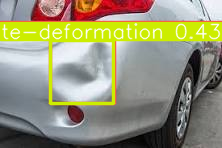

Detected damage severity: Moderate
No severe damage detected, only moderate.


In [17]:
import cv2
import torch
from pathlib import Path

# Set the base directory
base_dir = Path('C:/Hakathon/')  # Adjust this path to your project root

# Load the trained YOLOv5 model
model_path = base_dir / 'yolov5' / 'runs' / 'train' / 'exp' / 'weights' / 'best.pt'
model = torch.hub.load(str(base_dir / 'yolov5'), 'custom', path=str(model_path), source='local', autoshape=True)

# Path to the image for detection
img_path = base_dir / 'download1.jpeg'  # Adjust as per your directory structure

# Run YOLOv5 detection on the image
results = model(img_path)  # Pass the image path directly for preprocessing and inference

# Save and show results
results.save()  # Save results to `runs/detect/exp`
results.show()  # Display the image with bounding boxes

# Access the detection results
detections = results.pandas().xyxy[0]  # Pandas DataFrame with detections

# Function to classify damage severity based on labels
def classify_severity(detections):
    severe_labels = [
        'car-part-crack', 'detachment', 'glass-crack', 'lamp-crack', 'severe-deformation'
    ]
    moderate_labels = [
        'crack', 'minor-deformation', 'moderate-deformation', 'paint-chips', 'scratch', 
        'scratches', 'side-mirror-crack'
    ]
    
    severity = "Moderate"  # Default to Moderate
    detected_damages = detections['name'].values
    
    if any(label in severe_labels for label in detected_damages):
        severity = "Severe"
        
    return severity, detections

# Classify damage severity based on labels
severity, detections = classify_severity(detections)
print(f"Detected damage severity: {severity}")

# Highlight damaged areas by drawing bounding boxes only if severity is Severe
img = cv2.imread(str(img_path))  # Reload the image for annotation
if severity == "Severe":
    for _, row in detections.iterrows():
        xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        # Drawing a red rectangle to indicate the damaged area for severe damage
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)  # Red color with thickness 2

    # Save the annotated image
    output_img_path = base_dir / 'runs' / 'detect' / 'exp' / 'damaged_image_severe.jpg'
    cv2.imwrite(str(output_img_path), img)
    print(f"Marked image saved at: {output_img_path}")
else:
    print("No severe damage detected, only moderate.")

# Display the image (requires an appropriate display tool)
# Example: display.Image(filename=str(output_img_path), width=600)
